In [131]:
#construct a decision tree classifier. ~99% accuracy from cross validation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [132]:
#import feature_extraction

#for i in range(1,10):
#    feature_extraction.extract(i)

In [133]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [134]:
[x.shape for x in datalabels]

[(2142, 99),
 (2276, 99),
 (1463, 99),
 (2007, 99),
 (2366, 99),
 (2166, 99),
 (1994, 99),
 (2261, 99),
 (0, 99)]

In [135]:
datalabels=np.vstack(datalabels)

In [136]:
#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]

In [149]:
cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
cls.fit(traindata2,trainlabels2)
cross_val_score(cls, traindata2, trainlabels2)

array([0.93368081, 0.91936645, 0.93105311])

In [150]:
cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
cls.fit(traindata2[:12000],trainlabels2[:12000])
cls.score(traindata2[12000:],trainlabels2[12000:])

0.933048128342246

In [151]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [152]:
a[:20]

[['ankle_a16_x_mean', 0.24837731226070642],
 ['hand_a16_freq_0.95', 0.127953395754536],
 ['chest_B_y_mean', 0.11189243806272797],
 ['chest_a16_y_std', 0.09765969265000013],
 ['hand_a16_x_mean', 0.09064985583730832],
 ['hand_gyro_freq_0.95', 0.07818542784330977],
 ['chest_gyro_y_std', 0.07808453741036331],
 ['ankle_a16_x_std', 0.061142158152373054],
 ['chest_gyro_y_mean', 0.03464807368653122],
 ['hand_a16_y_std', 0.02667366959992429],
 ['chest_a16_z_mean', 0.022424359762362775],
 ['ankle_gyro_freq_0.5', 0.022309078979856588],
 ['heart_rate_mean', 0.0],
 ['heart_rate_std', 0.0],
 ['hand_temp_mean', 0.0],
 ['hand_temp_std', 0.0],
 ['hand_a16_x_std', 0.0],
 ['hand_a16_y_mean', 0.0],
 ['hand_a16_z_mean', 0.0],
 ['hand_a16_z_std', 0.0]]

In [146]:
activity_dict={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'nordic walking',
              9:'watching TV',10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',
              16:'vacuum cleaning',17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing_soccer',
              24:'rope jumping'}
class_name=np.array([activity_dict[i] for i in activity_dict.keys()])[1:]

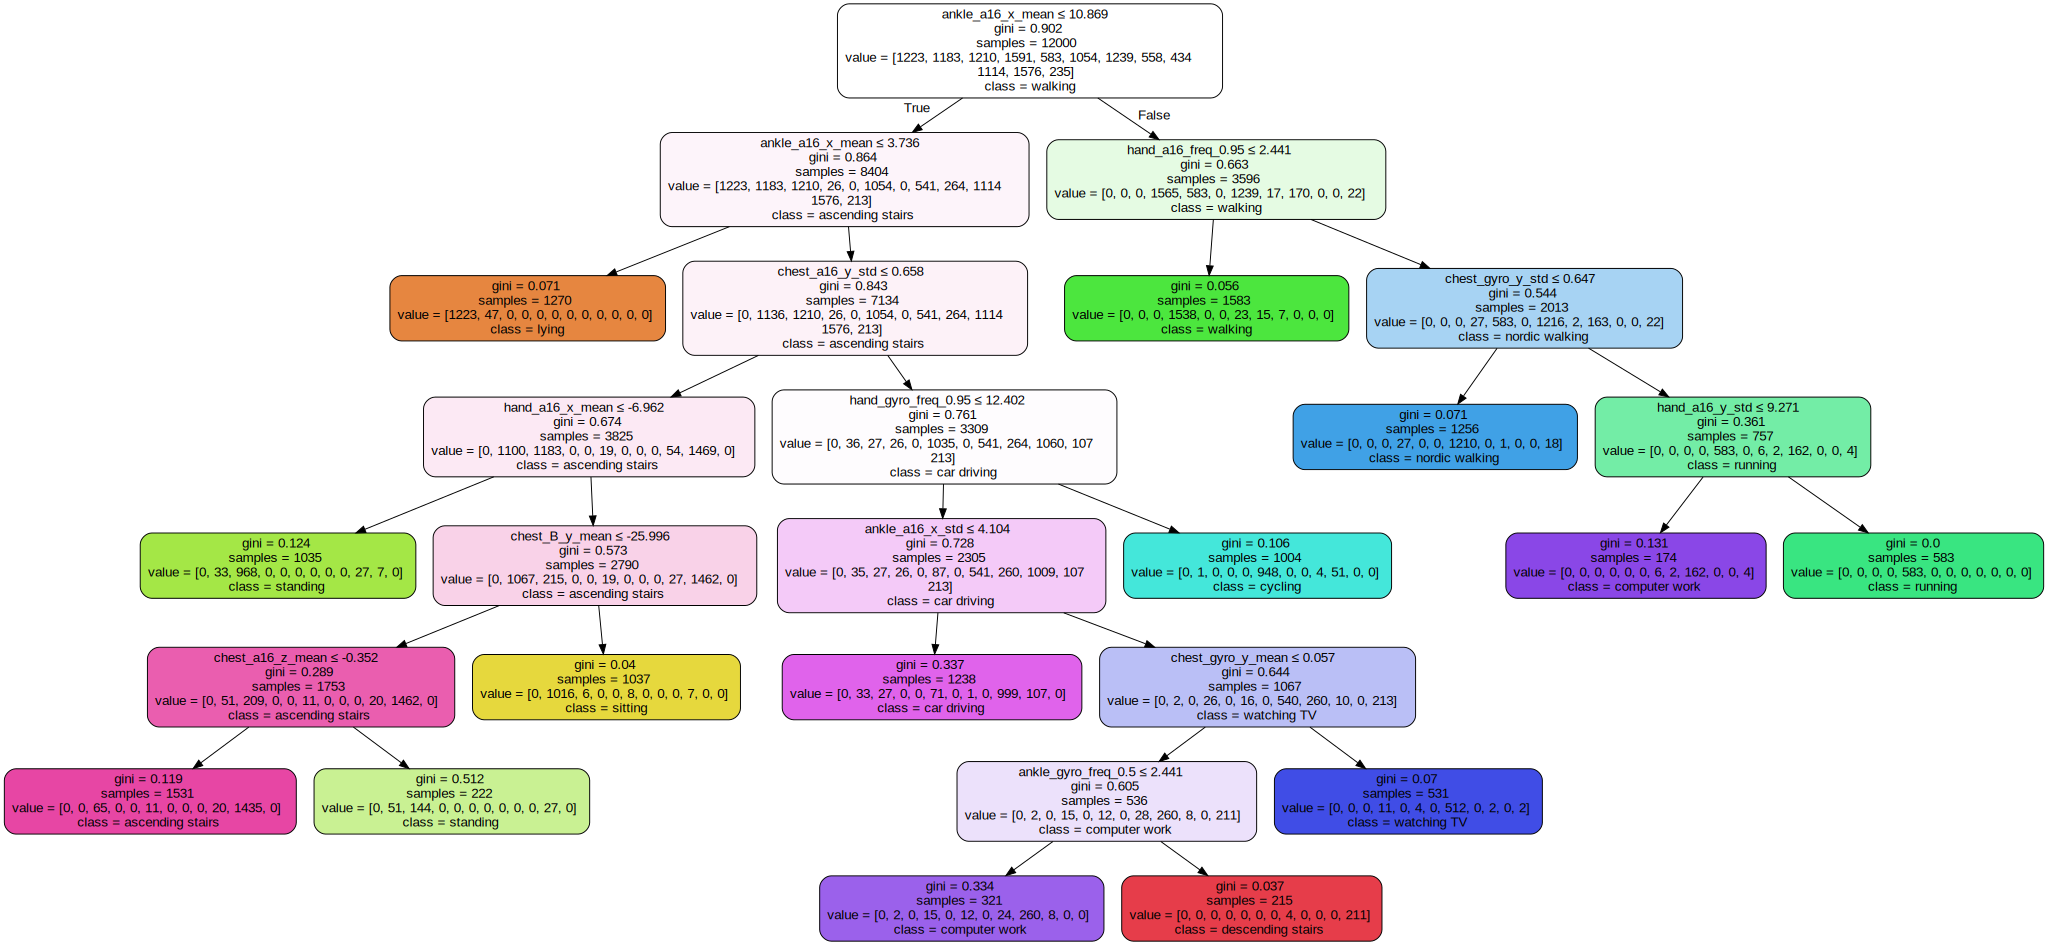

In [147]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [148]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [153]:
#check LOSO cross validation!
mean_scores=[]
for a in [14]:
    scores=[]
    for iout in range(1,9):

        datalabels=[]
        for i in range(1,iout):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        for i in range(iout+1,9):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        datalabels=np.vstack(datalabels)

        feature_names,validdatalabels=np.load('data'+str(iout)+'.npy')
        validdata2=validdatalabels[:,:98]
        validlabels2=validdatalabels[:,-1]

        #shuffle data
        np.random.shuffle(datalabels)

        traindata2=datalabels[:,:98]
        trainlabels2=datalabels[:,-1]

        cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=a)
        cls.fit(traindata2,trainlabels2)

        scores.append(cls.score(validdata2,validlabels2))
    mean_scores.append(np.mean(scores))
    print('a=',a,'mean_score=',np.mean(scores))

a= 14 mean_score= 0.8415465935032703


In [154]:
scores

[0.8244631185807656,
 0.8132688927943761,
 0.9084073820915927,
 0.7892376681614349,
 0.8195266272189349,
 0.830101569713758,
 0.9393179538615848,
 0.8080495356037152]

In [100]:
#mean score=0.84 after cross validation for hyperparameters, much worse than before
#maybe the overlapping time windows caused contamination between validation and training data

In [121]:
cls.score(validdata2,validlabels2)

0.8080495356037152

In [122]:
y_pred=cls.predict(validdata2)

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validlabels2, y_pred)

array([[  0, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 204,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 89,  11, 118,   0,   0,   0,   0,   0,   0,   0,   8,   0],
       [  0,   0,   0, 277,   0,   0,  12,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 225,   0,   0,   0,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0, 263,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  61,   4,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45,   0,   0,   0],
       [  0,   0,   0,   0,   0,  40,   0,   5,   0, 171,   1,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   3, 299,   0],
       [  0,   0,   0,   0,  21,   0,  11,   0,   5,   0,   0,  25]],
      dtype=int64)

In [65]:
class_name

array(['lying', 'sitting', 'standing', 'walking', 'running', 'cycling',
       'nordic walking', 'watching TV', 'computer work', 'car driving',
       'ascending stairs', 'descending stairs', 'vacuum cleaning',
       'ironing', 'folding laundry', 'house cleaning', 'playing_soccer',
       'rope jumping'], dtype='<U17')

In [ ]:
#lying misclassfied as sitting
#maybe need to recalibrate for each subject, ie. normalize data for a given subject?

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

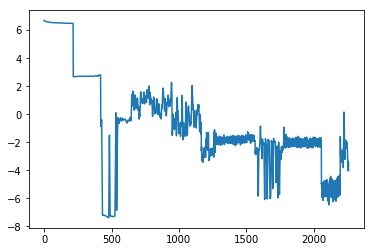

In [126]:
fig,ax=plt.subplots()
j=np.argwhere(np.array(feature_names)=='ankle_a16_y_mean')[0,0]
ax.plot(validdata2[:,j])

In [155]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("treeloso.pdf")

True